<a href="https://colab.research.google.com/github/piyush-an/INFO7374_Predict_StockPrice/blob/main/notebooks/1_NVDA_vs_Competitors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## PART 1. Focus on the stock you pick and their competitors
- Report summary statistics of the training period and plot the kernel density

| Symbol | Company | Year |
|---|---|---|
| NVDA | Nvidia Corporation | 1999 |
| AMD | Advanced Micro Devices (AMD) | 1972 |
| QCOM | Qualcomm Inc | 1991 |
| TSM | Taiwan Semiconductor Mfg. Co. Ltd. | 1997 |
| AVGO | Broadcom Corporation | 1961 |


## Install Dependency and files

In [39]:
%%bash

pip install pandas yfinance ta seaborn matplotlib pandas-datareader jinja2 fredapi openpyxl xgboost scikit-learn statsmodels mlflow



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Importing libraries.

In [40]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf
import ta
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader._utils import RemoteDataError

Define Start and End date for the data scope

In [41]:
# Start date
start_date = datetime(2023, 1, 1)
# End date
end_date = datetime(2023, 12, 31)

Download stock data for the 5 companies

In [42]:
# Our stock - NVDA
NVDA = yf.download("NVDA", start_date, end_date)

# Competitor stocks
# AMD
AMD = yf.download("AMD", start_date, end_date)
# Taiwan Semiconductor Mfg. Co
TSM = yf.download("TSM", start_date, end_date)
# Qualcomm
QCOM = yf.download("QCOM", start_date, end_date)
# Broadcom
AVGO = yf.download("AVGO", start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Reading column names:

In [43]:
cols = list(NVDA.columns)
cols

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

Subsetting the dataset for the featues we need:

In [44]:
NVDA_new = NVDA[["Open", "Close", "Adj Close", "Volume"]]
AMD_new = AMD[["Open", "Close", "Adj Close", "Volume"]]
TSM_new = TSM[["Open", "Close", "Adj Close", "Volume"]]
QCOM_new = QCOM[["Open", "Close", "Adj Close", "Volume"]]
AVGO_new = AVGO[["Open", "Close", "Adj Close", "Volume"]]

We define the *training period* from `01/01/2022 to 12/31/2022`.

In [45]:
# Training period - 2022
train_start_date = datetime(2022, 6, 1)
train_end_date = datetime(2023, 5, 31)
# Testing period - 2023
test_start_date = datetime(2023, 6, 1)
test_end_date = datetime(2023, 11, 30)

Renaming the features corresponding to each stock:

In [46]:
cols = list(NVDA_new.columns)
for col in cols:
    NVDA_new.rename(columns={col: "NVDA_" + col}, inplace=True)
    AMD_new.rename(columns={col: "AMD_" + col}, inplace=True)
    TSM_new.rename(columns={col: "TSM_" + col}, inplace=True)
    QCOM_new.rename(columns={col: "QCOM_" + col}, inplace=True)
    AVGO_new.rename(columns={col: "AVGO_" + col}, inplace=True)

/var/folders/n1/y3njpjgd04gd1ptb7xkvrxkh0000gn/T/ipykernel_18822/1823967568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NVDA_new.rename(columns={col: "NVDA_" + col}, inplace=True)
/var/folders/n1/y3njpjgd04gd1ptb7xkvrxkh0000gn/T/ipykernel_18822/1823967568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMD_new.rename(columns={col: "AMD_" + col}, inplace=True)
/var/folders/n1/y3njpjgd04gd1ptb7xkvrxkh0000gn/T/ipykernel_18822/1823967568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Limiting the dataset for just the training period:

In [47]:
NVDA_new = NVDA_new.loc[train_start_date:train_end_date]
AMD_new = AMD_new.loc[train_start_date:train_end_date]
TSM_new = TSM_new.loc[train_start_date:train_end_date]
QCOM_new = QCOM_new.loc[train_start_date:train_end_date]
AVGO_new = AVGO_new.loc[train_start_date:train_end_date]

Concatinating the dataframes for NVDA and all the competitors:

In [48]:
final_df = pd.concat([NVDA_new, AMD_new, TSM_new, QCOM_new, AVGO_new], axis=1)
final_df

,NVDA_Open,NVDA_Close,NVDA_Adj Close,NVDA_Volume,AMD_Open,AMD_Close,AMD_Adj Close,AMD_Volume,TSM_Open,TSM_Close,TSM_Adj Close,TSM_Volume,QCOM_Open,QCOM_Close,QCOM_Adj Close,QCOM_Volume,AVGO_Open,AVGO_Close,AVGO_Adj Close,AVGO_Volume
Date,,,,,,,,,,,,,,,,,,,,
2023-01-03,148.509995,143.149994,143.086502,40127700,66.000000,64.019997,64.019997,46851800,75.849998,74.029999,72.960762,9276200,111.349998,107.199997,104.406326,8110400,565.000000,553.479980,543.651794,2017300
2023-01-04,145.669998,147.490005,147.424606,43132400,65.000000,64.660004,64.660004,47477100,74.989998,76.320000,75.217690,12316400,109.800003,111.529999,108.623489,7614200,562.989990,560.239990,550.291748,1707400
2023-01-05,144.910004,142.649994,142.586716,38916800,64.150002,62.330002,62.330002,46159500,76.000000,75.730003,74.636223,10039200,109.930000,109.400002,106.548988,7546000,555.710022,555.020020,545.164429,1627700
2023-01-06,144.740005,148.589996,148.524094,40504400,63.150002,63.959999,63.959999,70161300,76.500000,78.070000,76.942413,13744100,110.959999,115.339996,112.334198,10259300,563.119995,588.429993,577.981140,3526100
2023-01-09,152.839996,156.279999,156.210693,50423100,66.220001,67.239998,67.239998,69741300,80.559998,80.309998,79.150063,22247600,116.730003,114.610001,111.623222,10291800,592.299988,576.890015,566.646057,3773900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,302.100006,305.380005,305.296417,72141900,105.980003,108.269997,108.269997,65910500,89.279999,90.129997,89.290642,9443900,102.080002,103.019997,100.948158,8193700,681.440002,679.530029,672.267578,2302100
2023-05-25,385.230011,379.799988,379.696014,154391100,117.309998,120.349998,120.349998,108514700,97.059998,100.949997,100.009872,60793200,101.930000,104.019997,101.928047,11677400,699.409973,728.799988,721.010925,4926300
2023-05-26,378.899994,389.459991,389.353363,71439700,122.459999,127.029999,127.029999,92922800,100.849998,103.209999,102.248833,26135800,104.940002,110.349998,108.130737,15969900,747.429993,812.729980,804.043945,8250000


## Understanding the data

In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103 entries, 2023-01-03 to 2023-05-31
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NVDA_Open       103 non-null    float64
 1   NVDA_Close      103 non-null    float64
 2   NVDA_Adj Close  103 non-null    float64
 3   NVDA_Volume     103 non-null    int64  
 4   AMD_Open        103 non-null    float64
 5   AMD_Close       103 non-null    float64
 6   AMD_Adj Close   103 non-null    float64
 7   AMD_Volume      103 non-null    int64  
 8   TSM_Open        103 non-null    float64
 9   TSM_Close       103 non-null    float64
 10  TSM_Adj Close   103 non-null    float64
 11  TSM_Volume      103 non-null    int64  
 12  QCOM_Open       103 non-null    float64
 13  QCOM_Close      103 non-null    float64
 14  QCOM_Adj Close  103 non-null    float64
 15  QCOM_Volume     103 non-null    int64  
 16  AVGO_Open       103 non-null    float64
 17  AVGO_Close      

## Summary Statistics

In [50]:
NVDA_new.columns

Index(['NVDA_Open', 'NVDA_Close', 'NVDA_Adj Close', 'NVDA_Volume'], dtype='object')

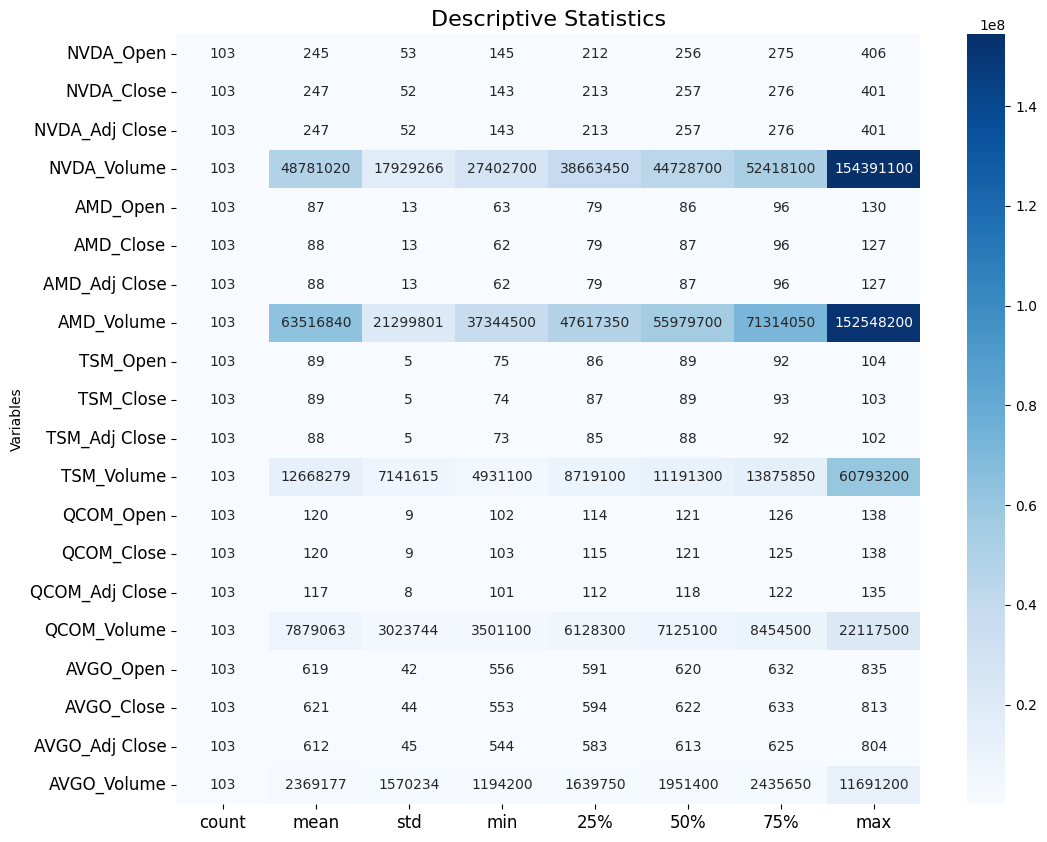

In [51]:
# Report view
report = final_df.describe().T  # Transpose index and columns
# Put report in a dataframe
report_df = pd.DataFrame(
    index=[
        "NVDA_Open",
        "NVDA_Close",
        "NVDA_Adj Close",
        "NVDA_Volume",
        "AMD_Open",
        "AMD_Close",
        "AMD_Adj Close",
        "AMD_Volume",
        "TSM_Open",
        "TSM_Close",
        "TSM_Adj Close",
        "TSM_Volume",
        "QCOM_Open",
        "QCOM_Close",
        "QCOM_Adj Close",
        "QCOM_Volume",
        "AVGO_Open",
        "AVGO_Close",
        "AVGO_Adj Close",
        "AVGO_Volume"
    ],
    columns=["count", "mean", "std", "min", "25%", "50%", "75%", "max"],
    data=report,
)
# Plot the report
f, ax = plt.subplots(figsize=(12, 10))
# Heatmap
sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".0f")
plt.xticks(size=12)
plt.yticks(size=12, rotation=0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size=16)
plt.show()

## Kernel Density Plots

In [52]:
final_cols = final_df.columns

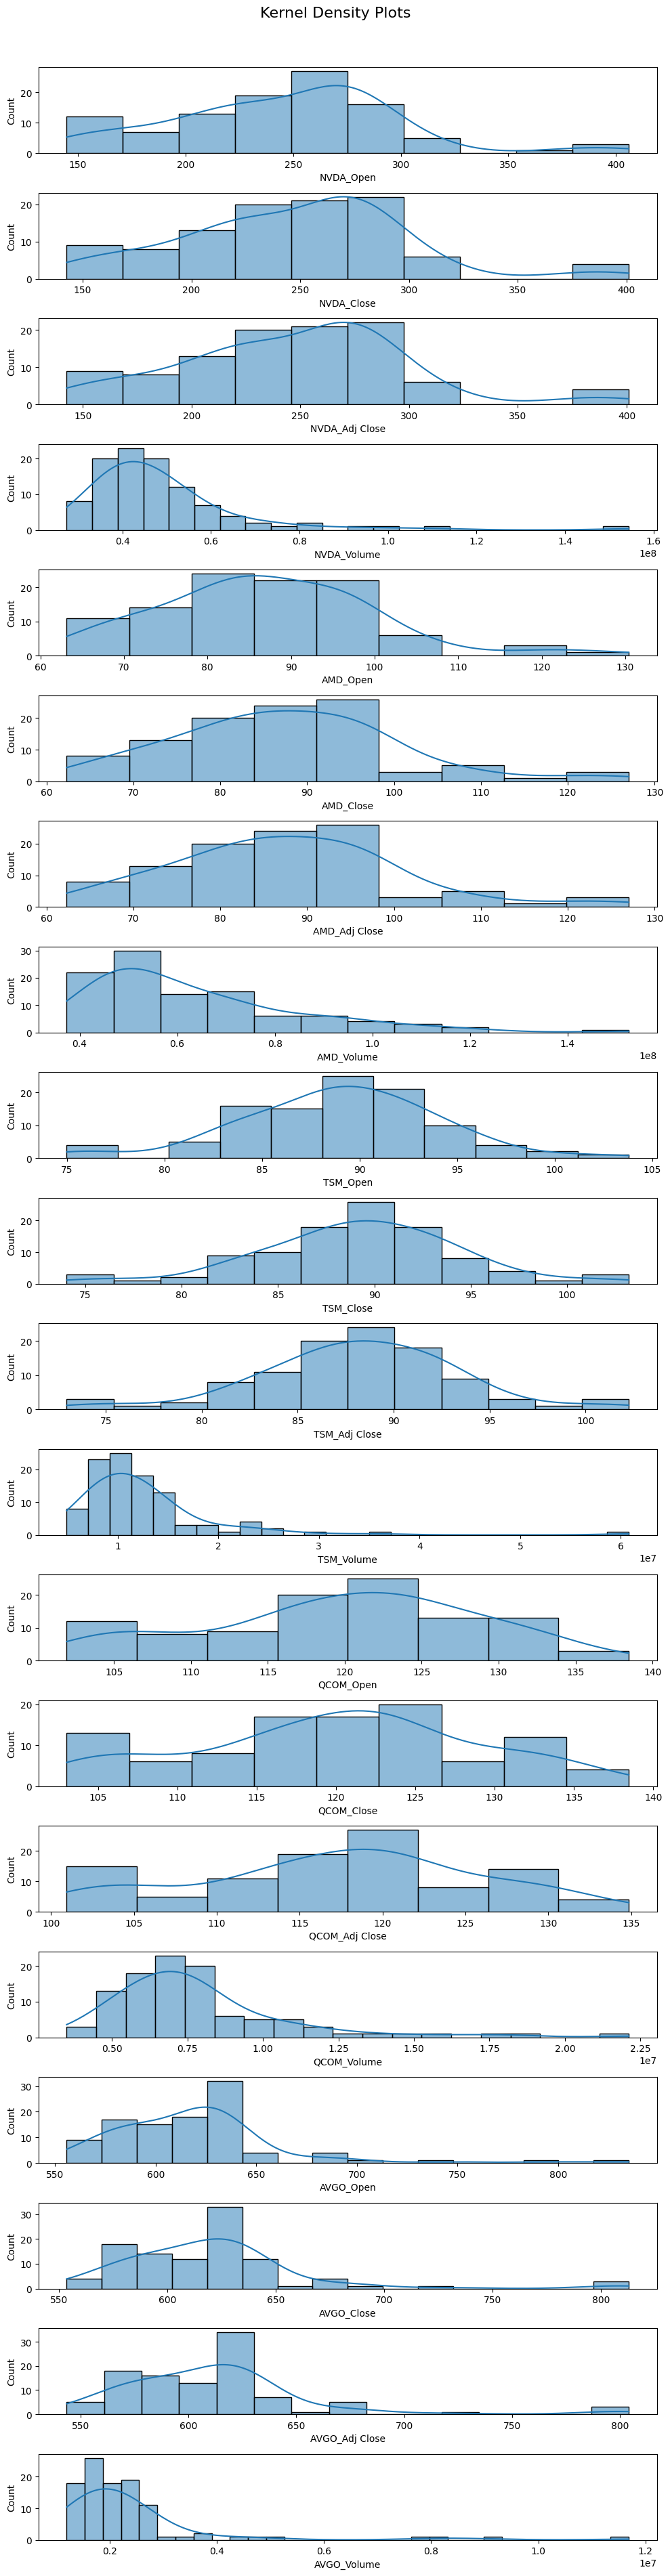

In [53]:
# Plotting 'price' target variable
fig, ax = plt.subplots(20, 1, figsize=(10, 40))
for i, col in enumerate(final_cols):
    sns.histplot(final_df[col], kde=True, bins="auto", ax=ax[i])
    ax[i].set_xlabel(col)
fig.suptitle("Kernel Density Plots", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

## Plotting Adj_Close price for all companies

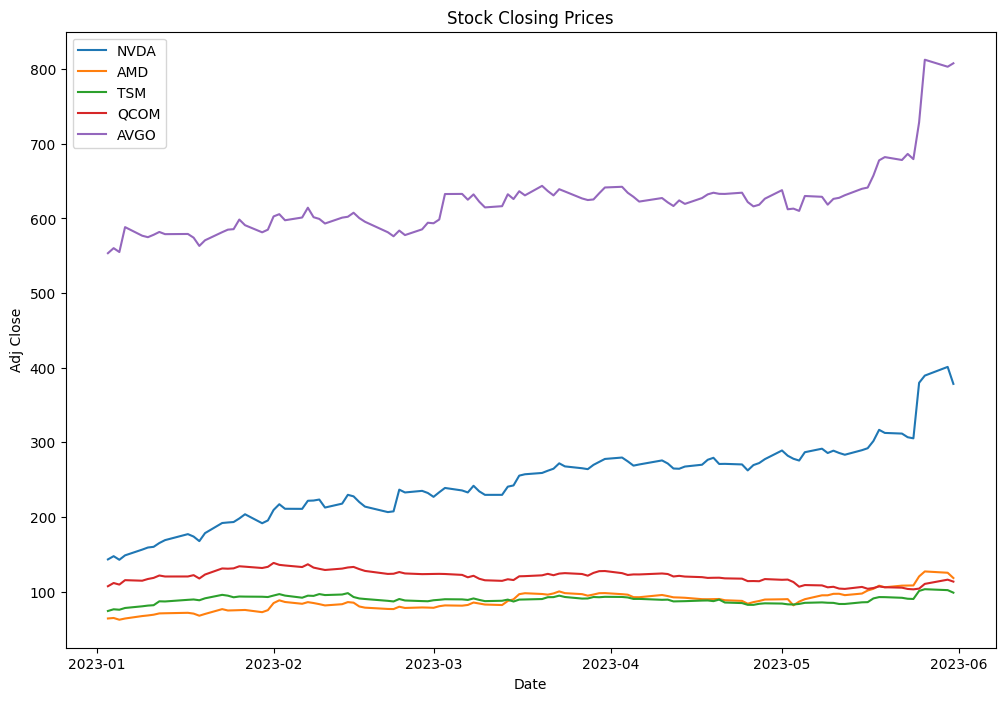

In [54]:
import matplotlib.pyplot as plt

company_list = ["NVDA", "AMD", "TSM", "QCOM", "AVGO"]
plt.figure(figsize=(12, 8))

for company in company_list:
    plt.plot(final_df[company + "_Close"], label=company)

plt.ylabel("Adj Close")
plt.xlabel("Date")
plt.title("Stock Closing Prices")
plt.legend()
plt.show()

## Plotting Volume of stocks sold for all companies

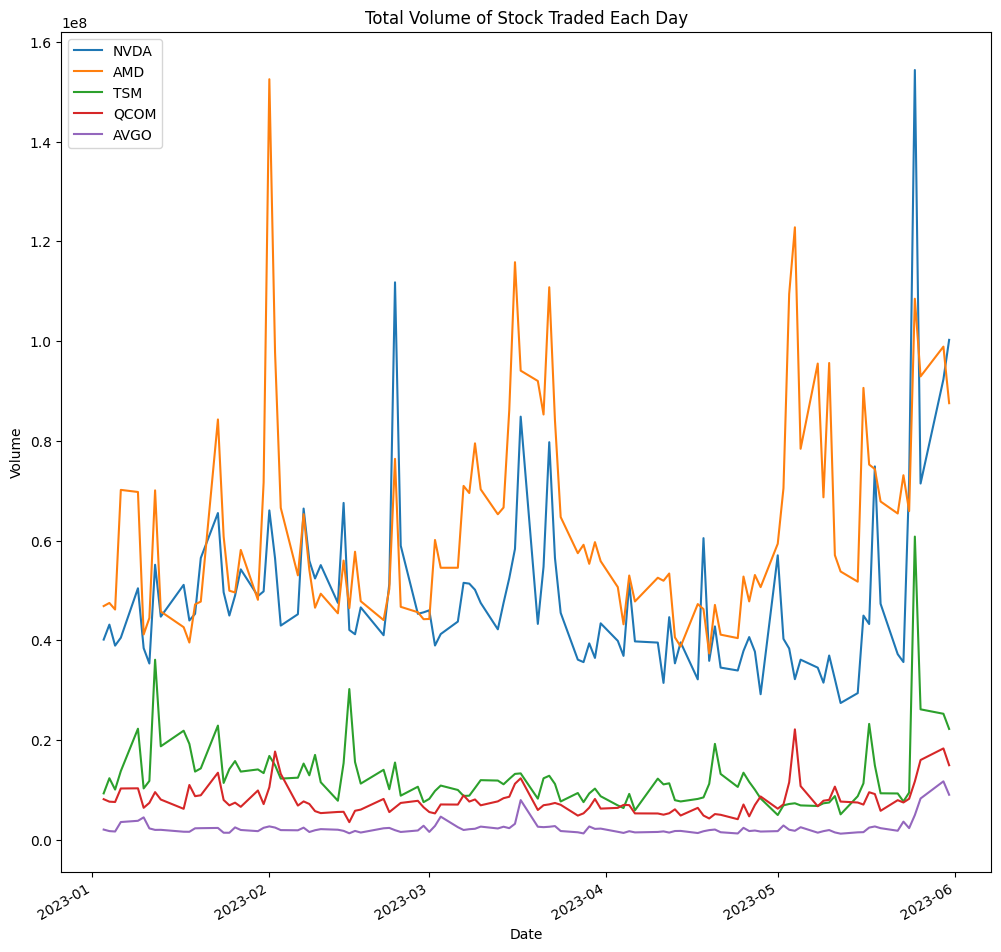

In [55]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.title("Total Volume of Stock Traded Each Day")

for company in company_list:
    final_df[company + "_Volume"].plot(label=company)

plt.ylabel("Volume")
plt.xlabel("Date")
plt.legend()
plt.show()

#### Pairplot to analyze relationship between Close price of all five company stocks

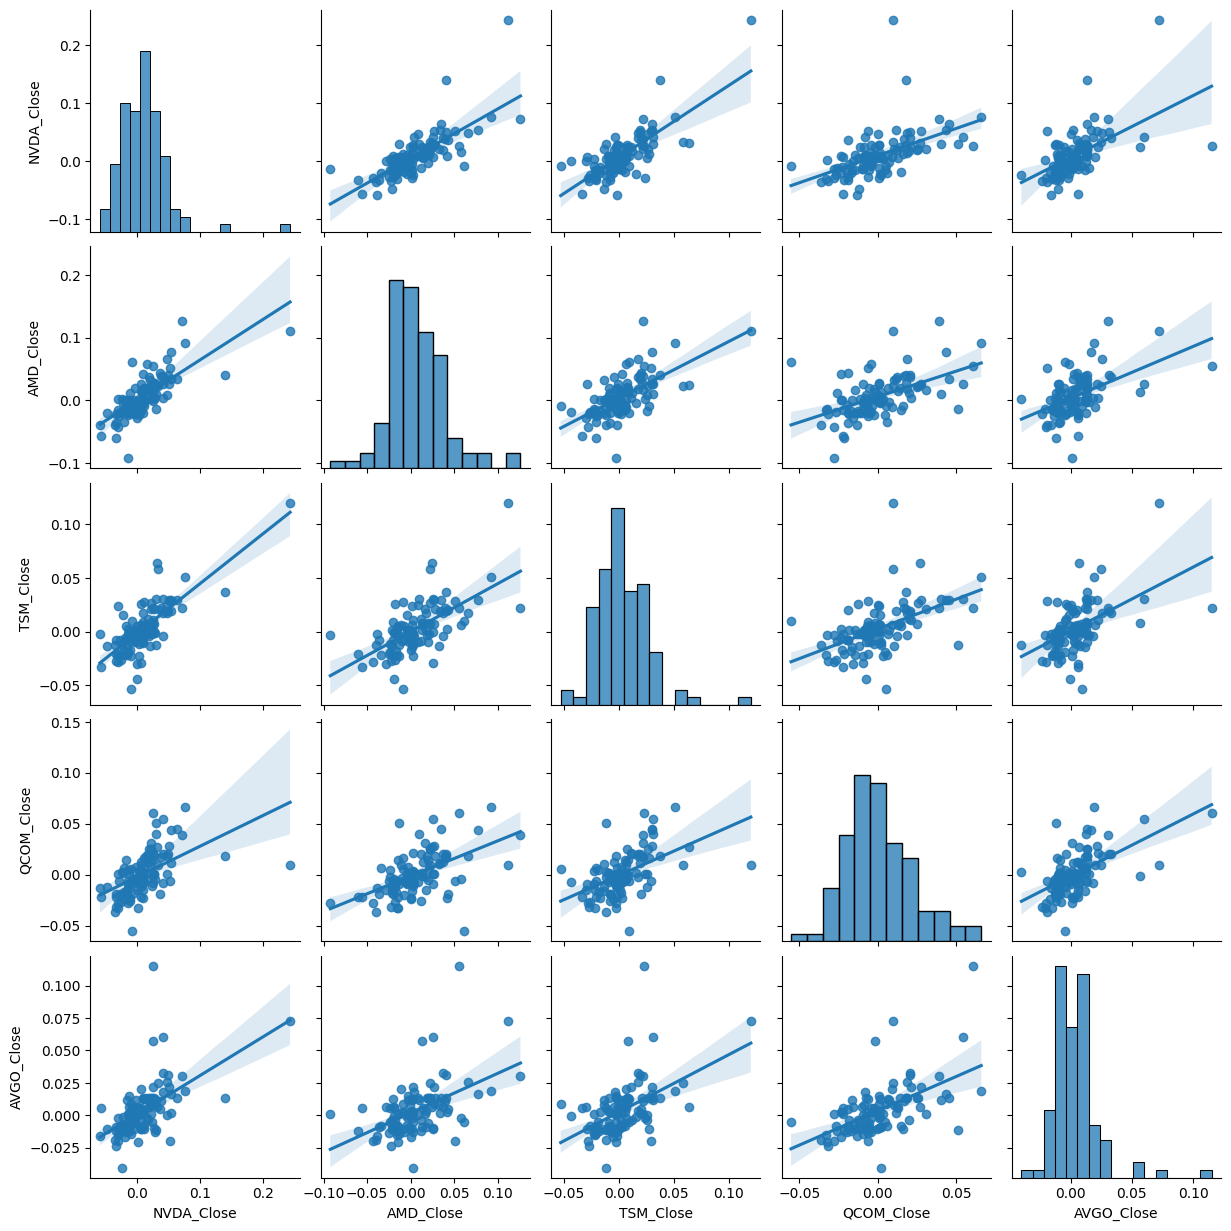

In [56]:
# Making a new DataFrame for returns
tech_rets = final_df[
    ["NVDA_Close", "AMD_Close", "TSM_Close", "QCOM_Close", "AVGO_Close"]
].pct_change()
sns.pairplot(tech_rets, kind="reg")

## Correlation between Open prices of all five stocks

In [57]:
final_df[
    ["NVDA_Open", "AMD_Open", "TSM_Open", "QCOM_Open", "AVGO_Open"]
].corr().style.background_gradient(cmap="coolwarm")

,NVDA_Open,AMD_Open,TSM_Open,QCOM_Open,AVGO_Open
NVDA_Open,1.000000,0.946313,0.368737,-0.438811,0.890048
AMD_Open,0.946313,1.000000,0.495352,-0.350920,0.916553
TSM_Open,0.368737,0.495352,1.000000,0.451849,0.474251
QCOM_Open,-0.438811,-0.350920,0.451849,1.000000,-0.388488
AVGO_Open,0.890048,0.916553,0.474251,-0.388488,1.000000


## Expected Return vs. Risk

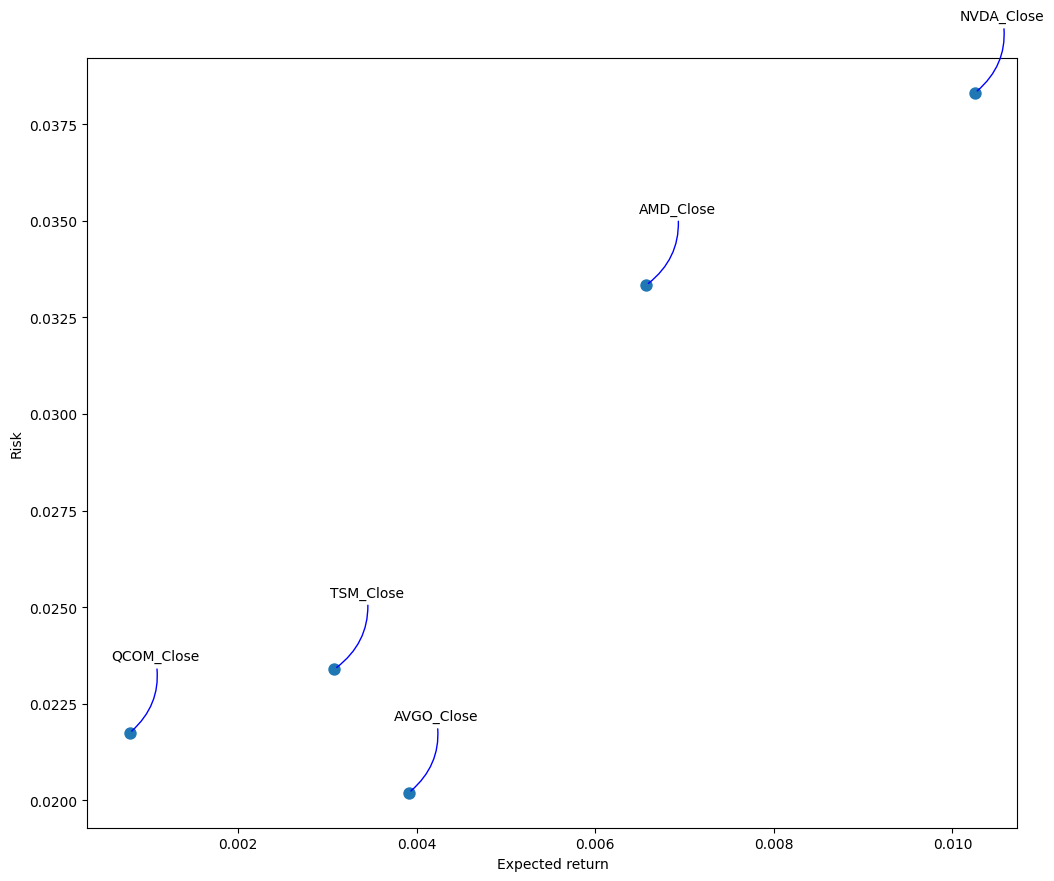

In [58]:
rets = tech_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected return")
plt.ylabel("Risk")
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(50, 50),
        textcoords="offset points",
        ha="right",
        va="bottom",
        arrowprops=dict(arrowstyle="-", color="blue", connectionstyle="arc3,rad=-0.3"),
    )

## Plotting Stock Trend and Pct. Returns

In [59]:
def plot_stock_trend_and_returns(ticker, titles, start_date, end_date, all_returns):
    # Get the data for this ticker
    prices = yf.download(ticker, start_date, end_date)
    prices = prices.Close

    # prices = web.DataReader(ticker, 'yahoo', start=start_date, end=end_date).Close
    prices.index = [d.date() for d in prices.index]

    plt.figure(figsize=(10, 6))

    # Plot stock price
    plt.subplot(2, 1, 1)
    plt.plot(prices)
    plt.title(titles[0], fontsize=16)
    plt.ylabel("Price ($)", fontsize=14)

    # Plot stock returns
    plt.subplot(2, 1, 2)
    plt.plot(all_returns[0], all_returns[1], color="g")
    plt.title(titles[1], fontsize=16)
    plt.ylabel("Pct. Return", fontsize=14)
    plt.axhline(0, color="k", linestyle="--")

    plt.tight_layout()

    plt.show()

## Stock Performance Analysis

In [60]:
def perform_analysis_for_stock(
    ticker, start_date, end_date, return_period_weeks, verbose=False
):
    """
    Inputs:
        ticker: the ticker symbol to analyze
        start_date: the first date considered in simulation
        end_date: the last date considered in simulation
        return_period_weeks: the number of weeks in which to calculate returns
        verbose: True if you want to print simulation steps

    Outputs:
        average and standard deviation of returns for simulated runs of this ticker within the given date range
    """

    # Get the data for this ticker
    try:
        prices = yf.download(ticker, start_date, end_date)
        prices = prices.Close
    # Could not find data on this ticker
    except (RemoteDataError, KeyError):
        # Return default values
        return -np.inf, np.inf, None

    prices.index = [d.date() for d in prices.index]

    # This will store all simulated returns
    pct_return_after_period = []
    buy_dates = []

    # Assume we buy the stock on each day in the range
    for buy_date, buy_price in prices.items():
        # Get price of the stock after given number of weeks
        sell_date = buy_date + timedelta(weeks=return_period_weeks)

        try:
            sell_price = prices[prices.index == sell_date].iloc[0]
        # Trying to sell on a non-trading day, skip
        except IndexError:
            continue

        # Compute the percent return
        pct_return = (sell_price - buy_price) / buy_price
        pct_return_after_period.append(pct_return)
        buy_dates.append(buy_date)

        if verbose:
            print("Date Buy: %s, Price Buy: %s" % (buy_date, round(buy_price, 2)))
            print("Date Sell: %s, Price Sell: %s" % (sell_date, round(sell_price, 2)))
            print("Return: %s%%" % round(pct_return * 100, 1))
            print("-------------------")

    # If no data collected return default values
    if len(pct_return_after_period) == 0:
        return -np.inf, np.inf, None

    # Report average and deviation of the percent returns
    return (
        np.mean(pct_return_after_period),
        np.std(pct_return_after_period),
        [buy_dates, pct_return_after_period],
    )

In [61]:
# Start date for simulation.
# Further back means more training data but risk of including patterns that no longer exist
# More recent means less training data but only using recent patterns
start_date, end_date = datetime(2023, 6, 1), datetime(2023, 12, 1)

# set number of weeks in which you want to see return
return_period_weeks = 4

# Minimum average return
min_avg_return = 0.1

# Maximum volatility in return
max_dev_return = 0.07

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


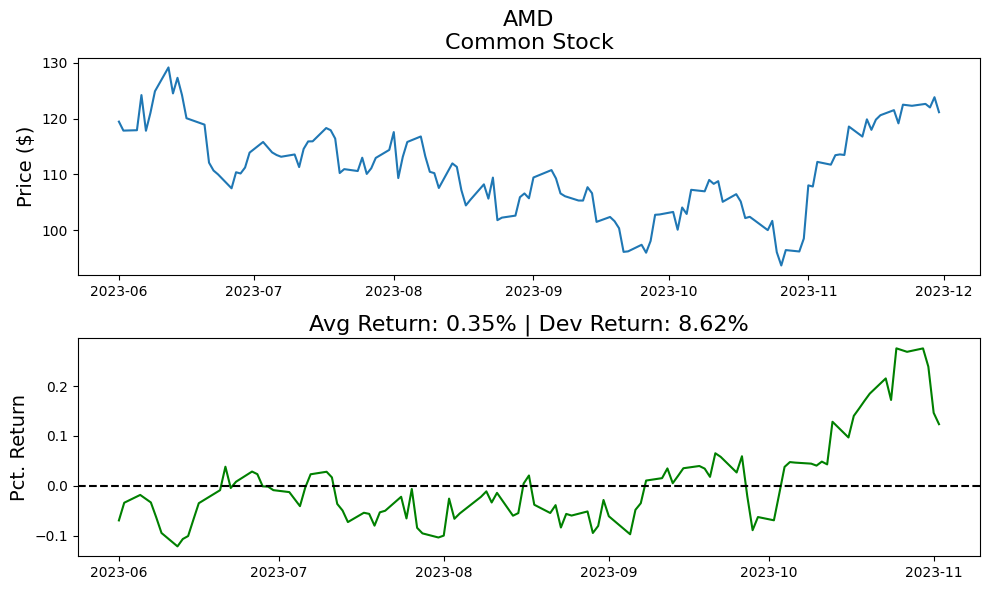

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


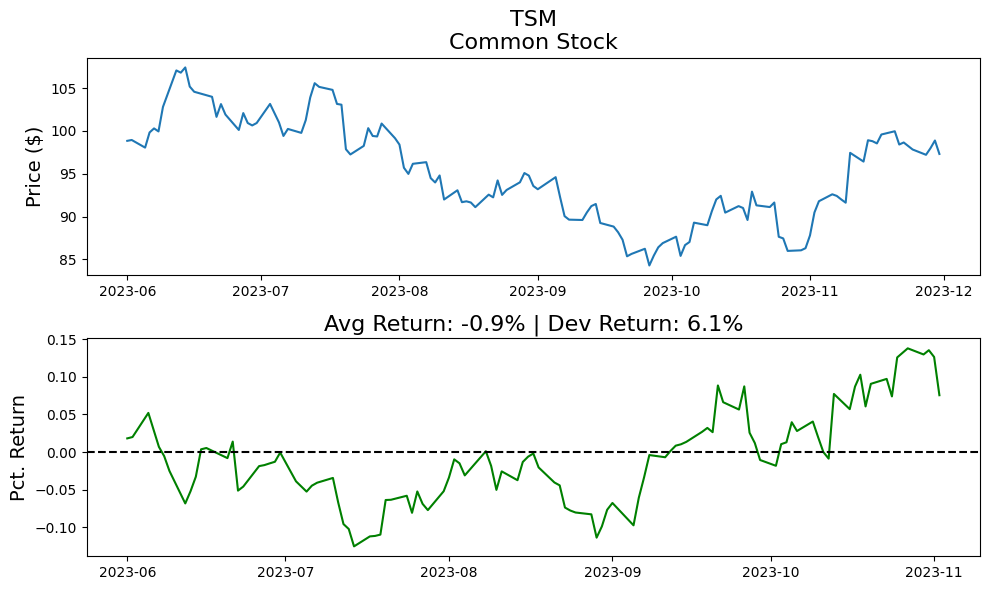

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


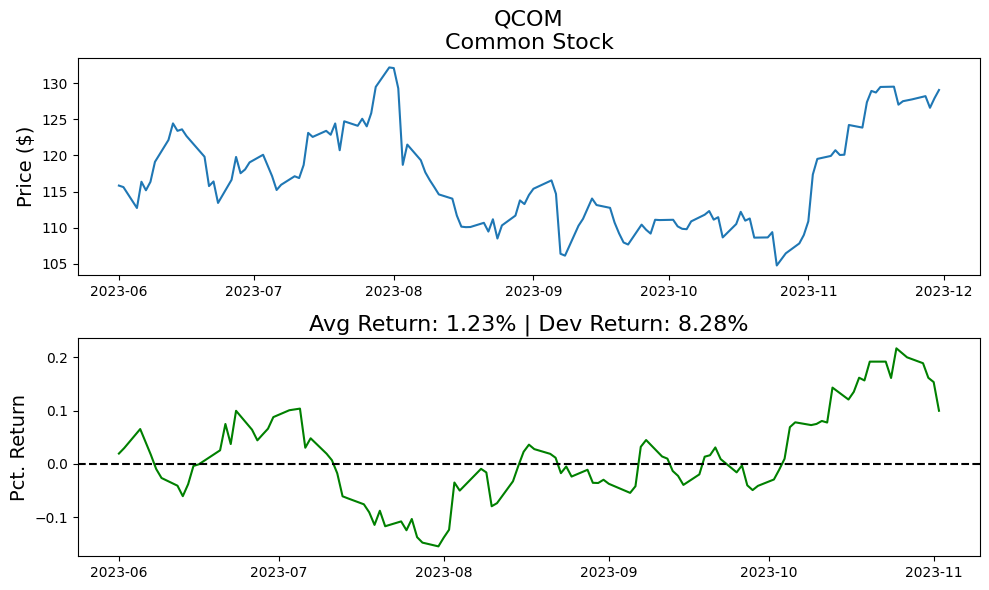

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


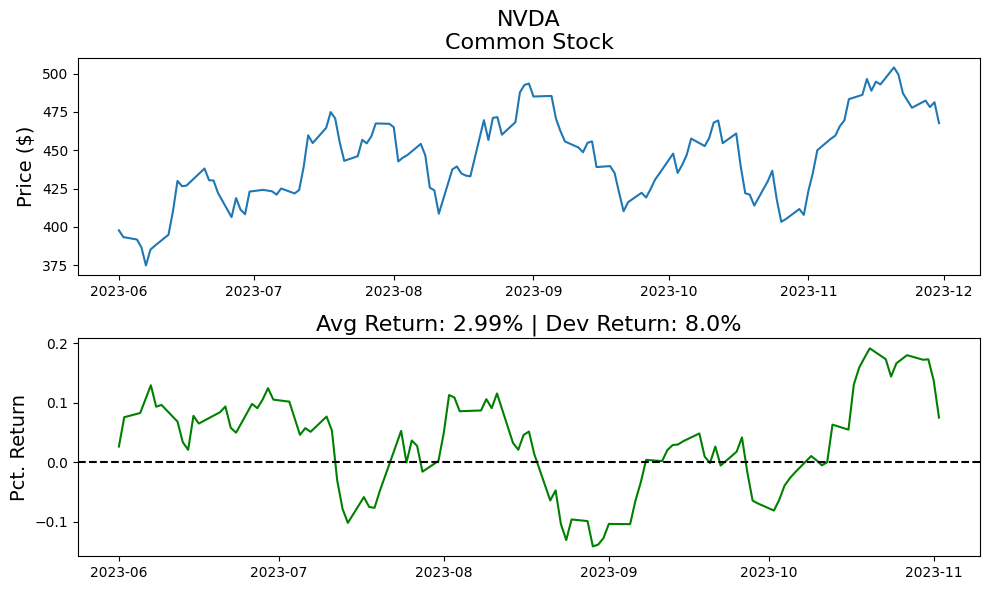

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


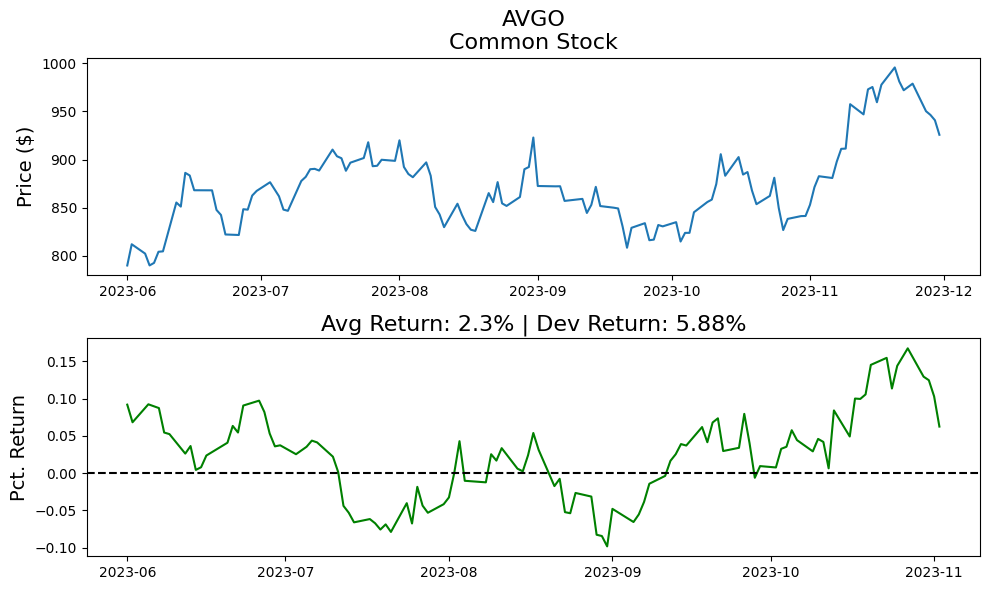

In [62]:
stocks = ["AMD", "TSM", "QCOM", "NVDA", "AVGO"]
for stock in stocks:
    avg_return, dev_return, all_returns = perform_analysis_for_stock(
        stock, start_date, end_date, return_period_weeks
    )
    title_price = "%s\n%s" % (stock, "Common Stock")
    title_return = "Avg Return: %s%% | Dev Return: %s%%" % (
        round(100 * avg_return, 2),
        round(100 * dev_return, 2),
    )
    plot_stock_trend_and_returns(
        stock, [title_price, title_return], start_date, end_date, all_returns
    )